#  Load the Dataset

In [ ]:
import pandas as pd
import numpy as np
import random
import time,datetime 

In [ ]:
np.random.seed(0)
num_entries = 1000

data = {
    'CustomerID': np.random.randint(1, 100, num_entries),
    'PurchaseDate': pd.date_range(start='2023-01-01', periods=num_entries, freq='D').tolist(),
    'ProductID': np.random.randint(1, 50, num_entries),
    'ProductName': [f"Product {i}" for i in np.random.randint(1, 50, num_entries)],
    'Category': [random.choice(['Electronics', 'Clothing', 'Home', 'Books', 'Sports']) for _ in range(num_entries)],
    'Quantity': np.random.randint(1, 10, num_entries),
    'Price': np.round(np.random.uniform(10.0, 500.0, num_entries), 2),
    'TotalAmount': lambda df: df['Quantity'] * df['Price'],
    'PaymentMethod': [random.choice(['Credit Card', 'Debit Card', 'PayPal', 'Cash']) for _ in range(num_entries)]
}

df = pd.DataFrame(data)
df['TotalAmount'] = df['Quantity'] * df['Price']

# Save to CSV
df.to_csv('customer_purchases.csv', index=False)

# Data cleaning

In [3]:

df.drop_duplicates(inplace = True)


In [4]:
df.describe()

,CustomerID,PurchaseDate,ProductID,Quantity,Price,TotalAmount
count,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.723000,2024-05-14 12:00:00,24.768000,5.013000,252.822170,1264.433020
min,1.000000,2023-01-01 00:00:00,1.000000,1.000000,10.850000,16.750000
25%,25.000000,2023-09-07 18:00:00,13.000000,3.000000,131.752500,415.630000
50%,49.000000,2024-05-14 12:00:00,25.000000,5.000000,243.520000,960.075000
75%,75.000000,2025-01-19 06:00:00,37.000000,7.000000,380.585000,1841.655000
max,99.000000,2025-09-26 00:00:00,49.000000,9.000000,499.970000,4465.530000
std,28.857183,NaN,13.960339,2.569715,142.283903,1036.317928


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CustomerID     1000 non-null   int32         
 1   PurchaseDate   1000 non-null   datetime64[ns]
 2   ProductID      1000 non-null   int32         
 3   ProductName    1000 non-null   object        
 4   Category       1000 non-null   object        
 5   Quantity       1000 non-null   int32         
 6   Price          1000 non-null   float64       
 7   TotalAmount    1000 non-null   float64       
 8   PaymentMethod  1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(3), object(3)
memory usage: 58.7+ KB


In [6]:
df.set_index('CustomerID', inplace =True)

In [7]:
df


,PurchaseDate,ProductID,ProductName,Category,Quantity,Price,TotalAmount,PaymentMethod
CustomerID,,,,,,,,
45,2023-01-01,37,Product 24,Home,4,106.96,427.84,PayPal
48,2023-01-02,6,Product 31,Home,1,69.72,69.72,Debit Card
65,2023-01-03,6,Product 18,Clothing,3,466.57,1399.71,PayPal
68,2023-01-04,39,Product 4,Home,6,499.97,2999.82,PayPal
68,2023-01-05,36,Product 48,Clothing,5,142.25,711.25,Credit Card
...,...,...,...,...,...,...,...,...
6,2025-09-22,14,Product 3,Sports,8,330.21,2641.68,PayPal
39,2025-09-23,44,Product 24,Sports,8,472.90,3783.20,Credit Card
39,2025-09-24,3,Product 44,Electronics,9,335.09,3015.81,Debit Card


In [8]:
df.sort_values(by = 'CustomerID', ascending = True).head(10)

,PurchaseDate,ProductID,ProductName,Category,Quantity,Price,TotalAmount,PaymentMethod
CustomerID,,,,,,,,
1,2023-02-23,24,Product 7,Home,6,485.10,2910.60,Cash
1,2024-08-14,10,Product 7,Clothing,3,99.28,297.84,Cash
1,2023-09-30,35,Product 12,Clothing,4,243.84,975.36,Credit Card
1,2025-08-21,18,Product 17,Sports,5,234.36,1171.80,Debit Card
1,2024-06-22,39,Product 32,Sports,5,448.70,2243.50,Debit Card
1,2023-02-24,27,Product 30,Sports,7,471.79,3302.53,Credit Card
1,2024-04-01,35,Product 39,Clothing,4,444.73,1778.92,PayPal
1,2024-06-10,34,Product 39,Books,7,159.68,1117.76,Cash
1,2025-02-26,42,Product 11,Electronics,2,35.76,71.52,Debit Card


In [9]:
pd.set_option('display.max.rows',1001)

In [10]:
df.sort_values(by = 'CustomerID', ascending = True)


,PurchaseDate,ProductID,ProductName,Category,Quantity,Price,TotalAmount,PaymentMethod
CustomerID,,,,,,,,
1,2023-02-23,24,Product 7,Home,6,485.10,2910.60,Cash
1,2024-08-14,10,Product 7,Clothing,3,99.28,297.84,Cash
1,2023-09-30,35,Product 12,Clothing,4,243.84,975.36,Credit Card
1,2025-08-21,18,Product 17,Sports,5,234.36,1171.80,Debit Card
1,2024-06-22,39,Product 32,Sports,5,448.70,2243.50,Debit Card
1,2023-02-24,27,Product 30,Sports,7,471.79,3302.53,Credit Card
1,2024-04-01,35,Product 39,Clothing,4,444.73,1778.92,PayPal
1,2024-06-10,34,Product 39,Books,7,159.68,1117.76,Cash
1,2025-02-26,42,Product 11,Electronics,2,35.76,71.52,Debit Card


In [11]:
df.reset_index(inplace = True)

In [12]:
df

,CustomerID,PurchaseDate,ProductID,ProductName,Category,Quantity,Price,TotalAmount,PaymentMethod
0,45,2023-01-01,37,Product 24,Home,4,106.96,427.84,PayPal
1,48,2023-01-02,6,Product 31,Home,1,69.72,69.72,Debit Card
2,65,2023-01-03,6,Product 18,Clothing,3,466.57,1399.71,PayPal
3,68,2023-01-04,39,Product 4,Home,6,499.97,2999.82,PayPal
4,68,2023-01-05,36,Product 48,Clothing,5,142.25,711.25,Credit Card
5,10,2023-01-06,25,Product 35,Sports,3,157.87,473.61,Credit Card
6,84,2023-01-07,16,Product 17,Clothing,8,90.84,726.72,PayPal
7,22,2023-01-08,21,Product 19,Clothing,4,234.27,937.08,Credit Card
8,37,2023-01-09,10,Product 43,Home,8,434.26,3474.08,Credit Card
9,88,2023-01-10,5,Product 19,Books,4,353.74,1414.96,Debit Card


In [13]:
df['PurchaseDate'] =df['PurchaseDate'].astype(str)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     1000 non-null   int32  
 1   PurchaseDate   1000 non-null   object 
 2   ProductID      1000 non-null   int32  
 3   ProductName    1000 non-null   object 
 4   Category       1000 non-null   object 
 5   Quantity       1000 non-null   int32  
 6   Price          1000 non-null   float64
 7   TotalAmount    1000 non-null   float64
 8   PaymentMethod  1000 non-null   object 
dtypes: float64(2), int32(3), object(4)
memory usage: 58.7+ KB


In [15]:
for i in df['PurchaseDate']:
    if i == 2025:
        i.replace(2024)

In [16]:
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])


In [17]:
df['Year']=df['PurchaseDate'].dt.year

In [18]:
df['Month']=df['PurchaseDate'].dt.month

In [19]:
df['Year'] = df['Year'].astype(str)
df['Month'] = df['Month'].astype(str)

In [20]:
df['Year'] = df['Year'].replace('2025', '2022')


In [21]:
df

,CustomerID,PurchaseDate,ProductID,ProductName,Category,Quantity,Price,TotalAmount,PaymentMethod,Year,Month
0,45,2023-01-01,37,Product 24,Home,4,106.96,427.84,PayPal,2023,1
1,48,2023-01-02,6,Product 31,Home,1,69.72,69.72,Debit Card,2023,1
2,65,2023-01-03,6,Product 18,Clothing,3,466.57,1399.71,PayPal,2023,1
3,68,2023-01-04,39,Product 4,Home,6,499.97,2999.82,PayPal,2023,1
4,68,2023-01-05,36,Product 48,Clothing,5,142.25,711.25,Credit Card,2023,1
5,10,2023-01-06,25,Product 35,Sports,3,157.87,473.61,Credit Card,2023,1
6,84,2023-01-07,16,Product 17,Clothing,8,90.84,726.72,PayPal,2023,1
7,22,2023-01-08,21,Product 19,Clothing,4,234.27,937.08,Credit Card,2023,1
8,37,2023-01-09,10,Product 43,Home,8,434.26,3474.08,Credit Card,2023,1
9,88,2023-01-10,5,Product 19,Books,4,353.74,1414.96,Debit Card,2023,1


In [22]:
df['DatePurchase'] = df['Year'] + '/' + df['Month']
df['DatePurchase'] = pd.to_datetime(df['DatePurchase'], format='%Y/%m', errors='coerce')
df['DatePurchase'] = df['DatePurchase'].dt.strftime('%Y/%m')


In [24]:
df[['Year', 'Month']]= df[['Year','Month']].astype(int)
df['DatePurchase'] = df['DatePurchase'].astype(str)
df

,CustomerID,PurchaseDate,ProductID,ProductName,Category,Quantity,Price,TotalAmount,PaymentMethod,Year,Month,DatePurchase
0,45,2023-01-01,37,Product 24,Home,4,106.96,427.84,PayPal,2023,1,2023/01
1,48,2023-01-02,6,Product 31,Home,1,69.72,69.72,Debit Card,2023,1,2023/01
2,65,2023-01-03,6,Product 18,Clothing,3,466.57,1399.71,PayPal,2023,1,2023/01
3,68,2023-01-04,39,Product 4,Home,6,499.97,2999.82,PayPal,2023,1,2023/01
4,68,2023-01-05,36,Product 48,Clothing,5,142.25,711.25,Credit Card,2023,1,2023/01
5,10,2023-01-06,25,Product 35,Sports,3,157.87,473.61,Credit Card,2023,1,2023/01
6,84,2023-01-07,16,Product 17,Clothing,8,90.84,726.72,PayPal,2023,1,2023/01
7,22,2023-01-08,21,Product 19,Clothing,4,234.27,937.08,Credit Card,2023,1,2023/01
8,37,2023-01-09,10,Product 43,Home,8,434.26,3474.08,Credit Card,2023,1,2023/01
9,88,2023-01-10,5,Product 19,Books,4,353.74,1414.96,Debit Card,2023,1,2023/01


In [25]:
df['ProductName'] = df['ProductName'].str.strip()

In [26]:
df

,CustomerID,PurchaseDate,ProductID,ProductName,Category,Quantity,Price,TotalAmount,PaymentMethod,Year,Month,DatePurchase
0,45,2023-01-01,37,Product 24,Home,4,106.96,427.84,PayPal,2023,1,2023/01
1,48,2023-01-02,6,Product 31,Home,1,69.72,69.72,Debit Card,2023,1,2023/01
2,65,2023-01-03,6,Product 18,Clothing,3,466.57,1399.71,PayPal,2023,1,2023/01
3,68,2023-01-04,39,Product 4,Home,6,499.97,2999.82,PayPal,2023,1,2023/01
4,68,2023-01-05,36,Product 48,Clothing,5,142.25,711.25,Credit Card,2023,1,2023/01
5,10,2023-01-06,25,Product 35,Sports,3,157.87,473.61,Credit Card,2023,1,2023/01
6,84,2023-01-07,16,Product 17,Clothing,8,90.84,726.72,PayPal,2023,1,2023/01
7,22,2023-01-08,21,Product 19,Clothing,4,234.27,937.08,Credit Card,2023,1,2023/01
8,37,2023-01-09,10,Product 43,Home,8,434.26,3474.08,Credit Card,2023,1,2023/01
9,88,2023-01-10,5,Product 19,Books,4,353.74,1414.96,Debit Card,2023,1,2023/01


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CustomerID     1000 non-null   int32         
 1   PurchaseDate   1000 non-null   datetime64[ns]
 2   ProductID      1000 non-null   int32         
 3   ProductName    1000 non-null   object        
 4   Category       1000 non-null   object        
 5   Quantity       1000 non-null   int32         
 6   Price          1000 non-null   float64       
 7   TotalAmount    1000 non-null   float64       
 8   PaymentMethod  1000 non-null   object        
 9   Year           1000 non-null   int32         
 10  Month          1000 non-null   int32         
 11  DatePurchase   1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(5), object(4)
memory usage: 74.3+ KB


In [28]:
non_numeric = {'Year': 'first',  
    'Month': 'first'} 
df.groupby('ProductName').agg({
    'Year': non_numeric['Year'],
    'Month': non_numeric['Month'],
    'Quantity': 'sum',
    'TotalAmount': 'sum'}).sort_values(by= 'ProductName', ascending = True)

,Year,Month,Quantity,TotalAmount
ProductName,,,,
Product 1,2023,2,108,23372.58
Product 10,2023,1,93,27975.54
Product 11,2023,1,101,26951.55
Product 12,2023,1,137,37416.57
Product 13,2023,11,88,21245.16
Product 14,2023,7,101,21858.07
Product 15,2023,3,69,16268.43
Product 16,2023,2,74,17243.41
Product 17,2023,1,151,34392.75


# EDA

In [29]:
df

,CustomerID,PurchaseDate,ProductID,ProductName,Category,Quantity,Price,TotalAmount,PaymentMethod,Year,Month,DatePurchase
0,45,2023-01-01,37,Product 24,Home,4,106.96,427.84,PayPal,2023,1,2023/01
1,48,2023-01-02,6,Product 31,Home,1,69.72,69.72,Debit Card,2023,1,2023/01
2,65,2023-01-03,6,Product 18,Clothing,3,466.57,1399.71,PayPal,2023,1,2023/01
3,68,2023-01-04,39,Product 4,Home,6,499.97,2999.82,PayPal,2023,1,2023/01
4,68,2023-01-05,36,Product 48,Clothing,5,142.25,711.25,Credit Card,2023,1,2023/01
5,10,2023-01-06,25,Product 35,Sports,3,157.87,473.61,Credit Card,2023,1,2023/01
6,84,2023-01-07,16,Product 17,Clothing,8,90.84,726.72,PayPal,2023,1,2023/01
7,22,2023-01-08,21,Product 19,Clothing,4,234.27,937.08,Credit Card,2023,1,2023/01
8,37,2023-01-09,10,Product 43,Home,8,434.26,3474.08,Credit Card,2023,1,2023/01
9,88,2023-01-10,5,Product 19,Books,4,353.74,1414.96,Debit Card,2023,1,2023/01


In [30]:
df.groupby('DatePurchase')['TotalAmount'].sum(numeric_only = True).sort_values( ascending = False)

DatePurchase
2022/07    51219.25
2023/08    50794.66
2024/08    50403.43
2022/04    46682.84
2022/05    45759.39
2024/12    44733.08
2023/09    43971.97
2023/10    43542.82
2022/08    43370.04
2024/05    43197.37
2024/03    41610.57
2024/07    40668.49
2024/04    39229.40
2023/03    38088.24
2024/02    37155.63
2024/01    37128.31
2023/07    36958.43
2023/11    36077.11
2022/09    35797.59
2022/01    35760.51
2023/12    35320.11
2022/02    35300.16
2024/06    35256.70
2023/06    34648.42
2023/01    33781.72
2024/10    33069.19
2023/05    32991.60
2024/09    31900.16
2024/11    31885.46
2023/04    31735.43
2023/02    31394.64
2022/03    30617.47
2022/06    24382.83
Name: TotalAmount, dtype: float64

In [31]:
df.groupby('ProductName')['TotalAmount'].sum(numeric_only = True)

ProductName
Product 1     23372.58
Product 10    27975.54
Product 11    26951.55
Product 12    37416.57
Product 13    21245.16
Product 14    21858.07
Product 15    16268.43
Product 16    17243.41
Product 17    34392.75
Product 18    40329.48
Product 19    26176.51
Product 2     13972.23
Product 20    22253.34
Product 21    31211.69
Product 22    26962.50
Product 23    25244.77
Product 24    30228.26
Product 25    13422.48
Product 26     9416.42
Product 27    30909.51
Product 28    46289.62
Product 29    19171.74
Product 3     11915.53
Product 30    35831.76
Product 31    29548.49
Product 32    30294.08
Product 33     6659.77
Product 34    26738.44
Product 35    15267.90
Product 36    16132.63
Product 37    26758.95
Product 38    45718.57
Product 39    24899.66
Product 4     39904.53
Product 40    21866.89
Product 41    24725.57
Product 42    29823.53
Product 43    21715.13
Product 44    36201.08
Product 45    28717.96
Product 46    13882.47
Product 47    20750.67
Product 48    30620.36

In [32]:
df.groupby('CustomerID')['TotalAmount'].sum(numeric_only = True).sort_values( ascending = False).head(10)

CustomerID
1     27083.05
70    25382.44
6     24715.69
4     24446.20
88    23687.75
34    21686.26
54    20306.72
11    19443.08
90    19319.01
37    19068.93
Name: TotalAmount, dtype: float64

In [33]:
df.groupby('Category')['TotalAmount'].sum(numeric_only = True).sort_values( ascending = False).head(10)

Category
Sports         261951.80
Clothing       258221.71
Home           256679.18
Electronics    253206.02
Books          234374.31
Name: TotalAmount, dtype: float64

In [34]:
df.groupby('PaymentMethod')['TotalAmount'].sum(numeric_only = True).sort_values( ascending = False)

PaymentMethod
Credit Card    335600.24
Debit Card     321009.22
Cash           312196.05
PayPal         295627.51
Name: TotalAmount, dtype: float64

# Data Visualization

In [50]:
graph1 = df.groupby('DatePurchase')['TotalAmount'].sum(numeric_only = True).sort_index(ascending = True)

<function matplotlib.pyplot.show(close=None, block=None)>

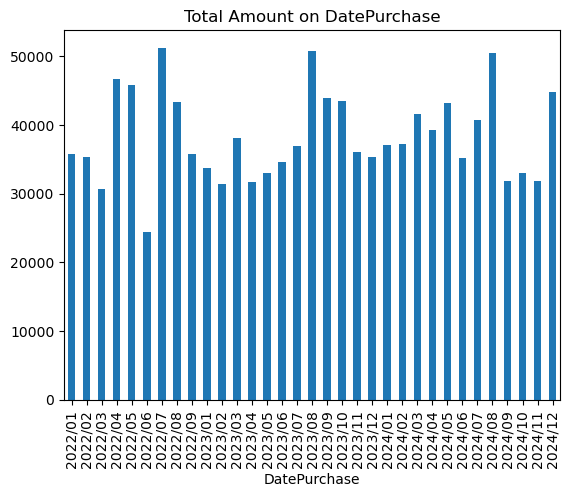

In [51]:
import matplotlib.pyplot as plt
graph1.plot(x = 'DatePurchase', y = 'TotalAmount', kind = 'bar' )
plt.title("Total Amount on DatePurchase")
plt.show

In [89]:
graph2 = df.groupby('ProductName')['Quantity'].sum(numeric_only = True).sort_values(ascending = False).head(10)
graph2

ProductName
Product 38    165
Product 28    160
Product 7     158
Product 17    151
Product 4     147
Product 9     146
Product 30    143
Product 12    137
Product 45    137
Product 48    131
Name: Quantity, dtype: int32

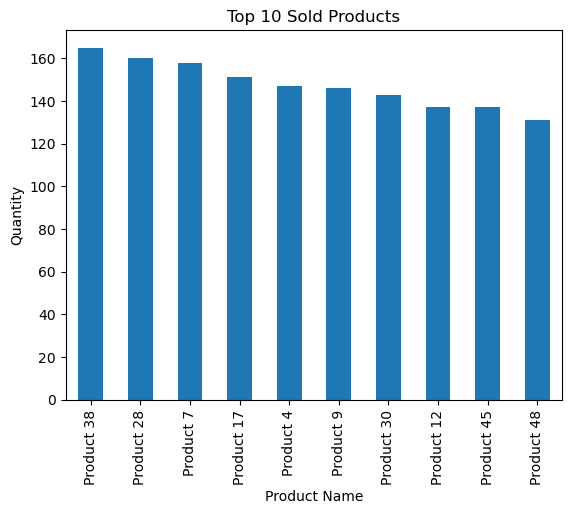

In [90]:
ax = graph2.plot(x='ProductName', y='Quantity', kind='bar')

ax.set_xlabel('Product Name')
ax.set_ylabel('Quantity')
ax.set_title('Top 10 Sold Products')
plt.show()

In [91]:
graph3 = df.groupby('CustomerID')['TotalAmount'].sum(numeric_only = True).sort_values(ascending = False).head(10)

graph3

CustomerID
1     27083.05
70    25382.44
6     24715.69
4     24446.20
88    23687.75
34    21686.26
54    20306.72
11    19443.08
90    19319.01
37    19068.93
Name: TotalAmount, dtype: float64

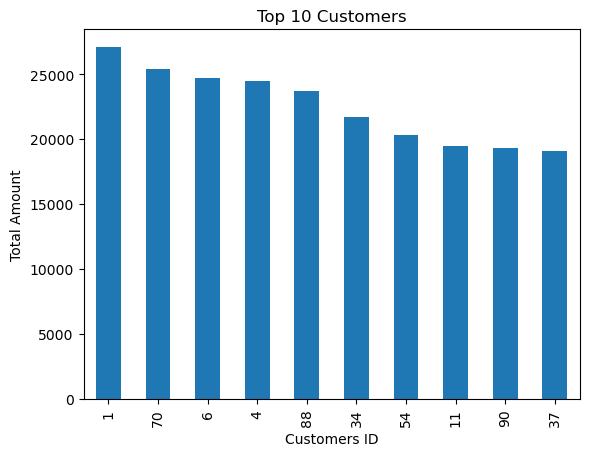

In [92]:
customer =graph3.plot(x = 'CustomerID', y = 'Total Amount', kind = 'bar')
customer.set_title('Top 10 Customers')
customer.set_xlabel('Customers ID')
customer.set_ylabel('Total Amount')
plt.show()

In [95]:
graph4 = df.groupby('Category')['TotalAmount'].sum(numeric_only = True)


<function matplotlib.pyplot.show(close=None, block=None)>

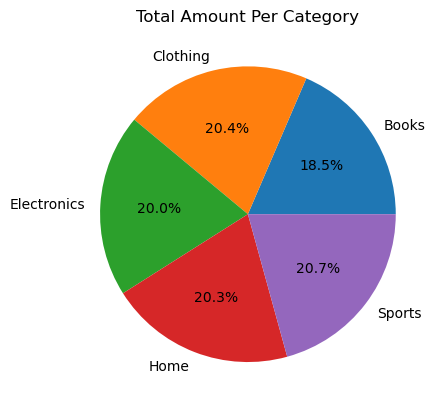

In [98]:
cat_graph=graph4.plot(kind='pie', y='Quantity', autopct='%1.1f%%')
cat_graph.set_title('Total Amount Per Category')
cat_graph.set_ylabel('')
plt.show